# Classification: Performance of the Naive Bayes algorithm on the given data set
Run theNaive Bayes tool on the resulting version of **`train_gr_smpl`**. To be able to do this in Weka, you may
need to apply several Weka “Filters”. Explain the reason for choosing and using these filters. Once
you can run the algorithm, record, compare and analyse the classifier’s accuracy on different classes
(as given by the confusion matrix).

### Proportional k-interval discretization
 According to the course textbook Equal Frequency binning is excellent for Naive bayes.
 
 **Specifically when the number of bins is equal to the sqaure root of the number of instances.** This is called Proportional k-interval discretization

In a nutshell Naive Bayse should find the probability of each of the 10 classes given each pixel. 
We should expect 10 output values per instance we are predicting that sum to 1. With the highest probability being the best guess of the class attribute according to naive bayse.


* Preprocess (filter the data) data
    * normalize the data filter
    * Scipy / Keras maybe
    * Justify how / why 
* 

[See here for scikit learn naive bayse](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [12]:
import helperfn
%load_ext autoreload
%autoreload 2

x, y = helperfn.get_data()
(x.shape, y.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


((9690, 2304), (9690, 1))

In [13]:
 type(x)

pandas.core.frame.DataFrame

In [14]:
x.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
         ...   
2299    float64
2300    float64
2301    float64
2302    float64
2303    float64
Length: 2304, dtype: object

In [15]:
# convert to nparray, split, and randomise
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), test_size=0.10, random_state=0)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8721, 2304), (8721, 1), (969, 2304), (969, 1))

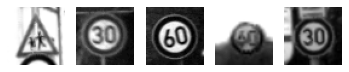

In [17]:
import matplotlib.pyplot as plt

num_images = 5

for i in range(num_images):
    row = X_train[i]
    image = row.reshape(48,48)
    plt.subplot(1, num_images, i+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [18]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)


CategoricalNB()

In [19]:
res = clf.predict(X_train)


In [20]:
#X_test[618]
import numpy as np
np.unique(res)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [22]:
print("Mean correct classifications training data: ", clf.score(X_train, y_train))
print("Mean correct classifications testing data: ", clf.score(X_test, y_test))

Mean correct classifications training data:  0.6517601192523793
Mean correct classifications testing data:  0.38596491228070173


In [25]:
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

accuracy_score(y_test, pred)

raw_data_sets = []

train_test_results = []
classifiers = []
scores = []
for i in range(-1, 10):
    raw_data_sets = raw_data_sets + [helperfn.get_data(i)]
    train_test_data = train_test_data + [train_test_split(raw_data_sets[i][0], raw_data_sets[i][1], test_size=0.2, random_state=0)]
    classifiers = classifiers + [CategoricalNB().fit(train_test_data[i][0], train_test_data[i][2])]
    scores = scores + [(classifiers[i].score(train_test_data[i][0], train_test_data[i][2]), classifiers[i].score(train_test_data[i][1], train_test_data[i][3]))]

for i in range(len(scores)):
    print("Scores for dataset: ", i-1)
    print("Training data score: ", scores[i][0])
    print("Testing data score: ", scores[i][1])
    print("--------------------------------------")